Comparing support vector machines (SVMs) with neural-networks for Gaussian Mixture classifcation and image-segmentation tasks. Image-segmentation based off TensorFlow tutorial https://www.tensorflow.org/tutorials/images/segmentation (with simpler structure/no pre-trained models for U-Net). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
from sklearn import svm
import time

tf.enable_v2_behavior()

Using a Support Vector Machine (SVM) with a linear kernel to find a decision boundary between two classes.

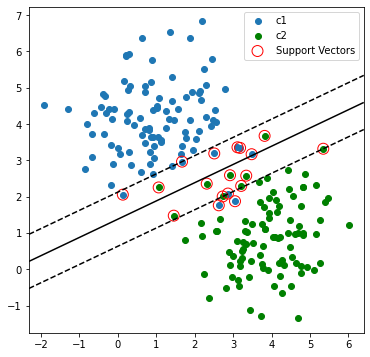

In [2]:
N_samps = 100
x1 = np.random.randn(N_samps,2)+[1,4]
x2 = np.random.randn(N_samps,2)+[4,1]
X = tf.concat([x1,x2],axis=0)
Y = np.concatenate([np.zeros(N_samps),np.ones(N_samps)])
svc_linear = svm.SVC(kernel='linear')
svc_linear.fit(X,Y)

fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(x1[:,0],x1[:,1],label='c1')
ax.scatter(x2[:,0],x2[:,1],label='c2',c='g')


#ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z_linear = svc_linear.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z_linear, colors='k', levels=[-1, 0, 1], alpha=1,
           linestyles=['--', '-', '--'])
# circling data that crosses margins of SVM
ax.scatter(svc_linear.support_vectors_[:, 0], svc_linear.support_vectors_[:, 1], s=120,
           linewidth=1, facecolors='none', edgecolors='r',label='Support Vectors')
plt.legend()

Using SVMs with a linear kernels to find decisions boundarys for each class using a one-vs-all scheme.
Class predictions are made using the confidence values of the decision function.

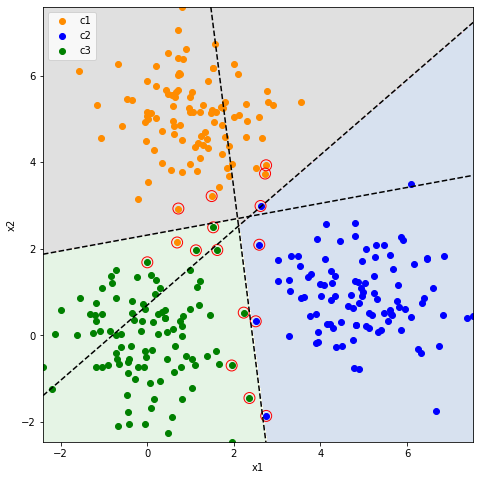

In [3]:
N_samps = 100
n_classes = 3
x1 = np.random.randn(N_samps,2)+[1,5]
x2 = np.random.randn(N_samps,2)+[5,1]
x3 = np.random.randn(N_samps,2)
X = np.concatenate([x1,x2,x3],axis=0)
Y = np.concatenate([np.zeros(N_samps),np.ones(N_samps),2*np.ones(N_samps)])
svc_2 = svm.SVC(kernel='linear')
svc_2.fit(X,Y)

fig,ax = plt.subplots(figsize=(8,8))
plt.scatter(x1[:,0],x1[:,1],label='c1',c='darkorange')
plt.scatter(x2[:,0],x2[:,1],label='c2',c='blue')
plt.scatter(x3[:,0],x3[:,1],label='c3',c='green')

# create grid to evaluate model
def plot_hyperplane(clf,div_index, min_x, max_x):
    # get the separating hyperplane
    w = clf.coef_[div_index]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[div_index]) / w[1]
    plt.plot(xx, yy, 'k--')
    plt.legend()
plt.scatter(svc_2.support_vectors_[:, 0], svc_2.support_vectors_[:, 1], s=120,
           linewidth=1, facecolors='none', edgecolors='r')
xlim = [X[:, 0].min(), X[:, 0].max()]
ylim = [X[:, 1].min(), X[:, 1].max()]
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = svc_2.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(-pred.reshape(xx.shape), cmap="Accent", alpha=.2,
              extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
for i in range(n_classes):
    plot_hyperplane(svc_2,i,xlim[0],xlim[1])
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_aspect('equal')

Training a fully connected neural network to predict class. Output is probability of a vector belonging to each class. Notice that the decision boundaries are no longer hyperplanes, since the neural network is a non-linear function.

Epoch 1/10
94/94 [==============================] - 0s 4ms/step - loss: 0.8408 - accuracy: 0.6237
Epoch 2/10
94/94 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8840
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.9293
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.9557
Epoch 5/10
94/94 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9697
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.1125 - accuracy: 0.9783
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.9893
Epoch 8/10
94/94 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9910
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9920
Epoch 10/10
94/94 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9923
Model: "sequential"

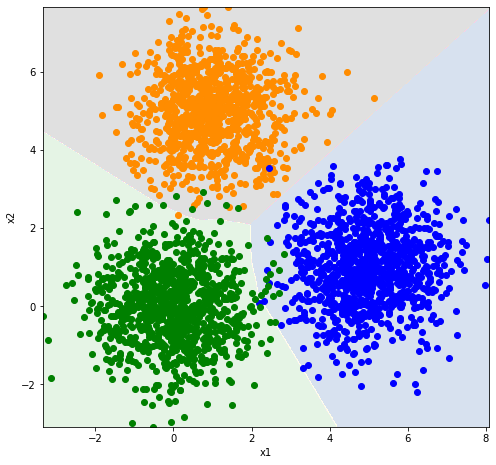

In [4]:
N_samps = 1000
n_classes = 3
c1 = np.random.randn(N_samps,2)+[1,5]
c2 = np.random.randn(N_samps,2)+[5,1]
c3 = np.random.randn(N_samps,2)
X = np.concatenate([c1,c2,c3],axis=0)
Y = np.concatenate([np.zeros(N_samps),np.ones(N_samps),2*np.ones(N_samps)])
x_train = tf.constant(X,dtype=tf.float32)
y_train = tf.constant(Y,dtype=tf.uint8)
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(n_classes)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_nn.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

model_nn.fit(x_train,y_train,epochs=10)
model_nn.summary()
# adding a Softmax layer to turn output into probability distribution
prob_model_nn = tf.keras.models.Sequential([
    model_nn,
    tf.keras.layers.Softmax()
])

### plotting predictions
fig,ax = plt.subplots(figsize=(8,8))
plt.scatter(c1[:,0],c1[:,1],label='c1',c='darkorange')
plt.scatter(c2[:,0],c2[:,1],label='c2',c='blue')
plt.scatter(c3[:,0],c3[:,1],label='c3',c='green')

xlim = [X[:, 0].min(), X[:, 0].max()]
ylim = [X[:, 1].min(), X[:, 1].max()]
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
x_vals = tf.constant(np.c_[xx.ravel(), yy.ravel()],dtype=tf.float32)
pred = tf.math.argmax(prob_model_nn(x_vals),axis=-1).numpy()
plt.imshow(-pred.reshape(xx.shape), cmap="Accent", alpha=.2,
              extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_aspect('equal')

Loading in traing data for pet image segmentation between 3 classes (background, pet outline, pet). Note that it will create a download folder in root (1.5 Gb). Sometimes I have issues downloading dataset but restarting cell usually fixes it.

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteFNX62J/oxford_iiit_pet-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteFNX62J/oxford_iiit_pet-test.tfrecord


Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


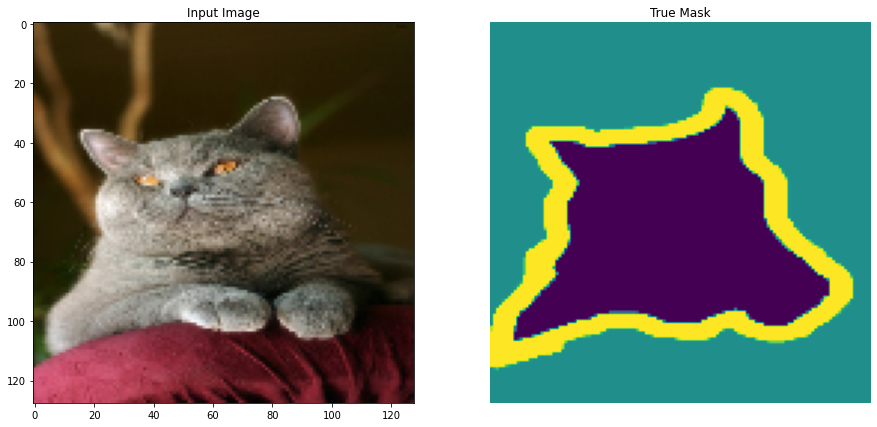

In [7]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
    plt.show()
    
# needed to install pillow
for image, mask in train.take(3):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

Turning tensorflow dataset structure to numpy array.

In [8]:
# testing using support vector machines for image segmentation
train_np = tfds.as_numpy(train.batch(TRAIN_LENGTH).take(1))
for x,y in train_np:
    print(x.shape,y.shape)
    X_train,Y_train = x,y
w,h,c = X_train.shape[1:]
# testing using support vector machines for image segmentation
TEST_LENGTH = info.splits['test'].num_examples
test_np = tfds.as_numpy(test.batch(TEST_LENGTH).take(1))
for x,y in test_np:
    X_test,Y_test = x,y

(3680, 128, 128, 3) (3680, 128, 128, 1)


In [9]:
N_train = 20
N_test = 5
X_train_r,Y_train_r = np.reshape(X_train[:N_train,...],(-1,c)),np.reshape(Y_train[:N_train,...],(-1)).astype(int)
X_test_r,Y_test_r = np.reshape(X_test[:N_test,...],(-1,c)),np.reshape(Y_test[:N_test,...],(-1)).astype(int)
unique, counts = np.unique(Y_train_r, return_counts=True)
print(dict(zip(unique, counts))) 

{0: 93342, 1: 201218, 2: 33120}


Training SVMs to make pixel-wise predictions between the 3 classes. Treats each pixel as a sample. Using LinearSVC significantly improves training time. Collapses down to 2 class predictions.

In [10]:
svcL_np = svm.LinearSVC()
t0 = time.time()
svcL_np.fit(X_train_r,Y_train_r)
t1 = time.time()
print('LinearSVC','N:',N_train,'time:','%.3f'%(t1-t0))
pred = svcL_np.predict(X_test_r)
pred = np.reshape(pred,(-1,h,w,1))
unique, counts = np.unique(pred, return_counts=True)
print(dict(zip(unique, counts))) 
# found that as the number of training batches increase,
# predict collapses down to two classes
# This is probabaly due to it being unbalanced for third class

LinearSVC N: 20 time: 14.743
{0: 7985, 1: 73935}


[Text(0.5, 1.0, 'Predicted Mask')]

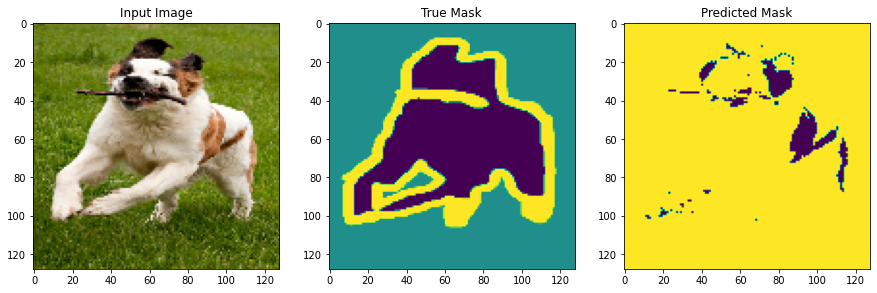

In [11]:
fig,axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(tf.keras.preprocessing.image.array_to_img(X_test[2,...]))
axs[0].set(title='Input Image')
axs[1].imshow(tf.keras.preprocessing.image.array_to_img(Y_test[2,...]))
axs[1].set(title='True Mask')
axs[2].imshow(tf.keras.preprocessing.image.array_to_img(pred[2,...]))
axs[2].set(title='Predicted Mask')

Using fully connected neural-network to make pixel-wise predictions between 3 classes. Again each pixel is treated as a individual sample.

In [12]:
# want to do pixel-wise image segmentation
# only considering 3 RGB channels
n_classes = 3
N_train = 10
X_train_tf = tf.constant(tf.reshape(X_train[:N_train,...],(-1,c)))
Y_train_tf = tf.constant(tf.reshape(Y_train[:N_train,...],(-1,1)))

model_pixel = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_classes)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_pixel.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

model_pixel.fit(X_train_tf,Y_train_tf,epochs=5,batch_size=100)
model_pixel.summary()
prob_model_pixel = tf.keras.models.Sequential([
    model_pixel,
    tf.keras.layers.Softmax()
])

def pred_mask(pred):
    pred_mask = tf.argmax(pred,axis=-1)
    pred_mask = tf.reshape(pred_mask,(h,w,1))
    return pred_mask

Epoch 1/5
1639/1639 [==============================] - 10s 6ms/step - loss: 0.6446 - accuracy: 0.7389
Epoch 2/5
1639/1639 [==============================] - 10s 6ms/step - loss: 0.6107 - accuracy: 0.7573
Epoch 3/5
1639/1639 [==============================] - 10s 6ms/step - loss: 0.5992 - accuracy: 0.7632
Epoch 4/5
1639/1639 [==============================] - 10s 6ms/step - loss: 0.5922 - accuracy: 0.7661
Epoch 5/5
1639/1639 [==============================] - 10s 6ms/step - loss: 0.5857 - accuracy: 0.7671
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  400       
_________________________________________________________________
batch_normalization (BatchNo multiple                  400       
_________________________________________________________________
dense_3 (Dense)              multiple                  5050      
______

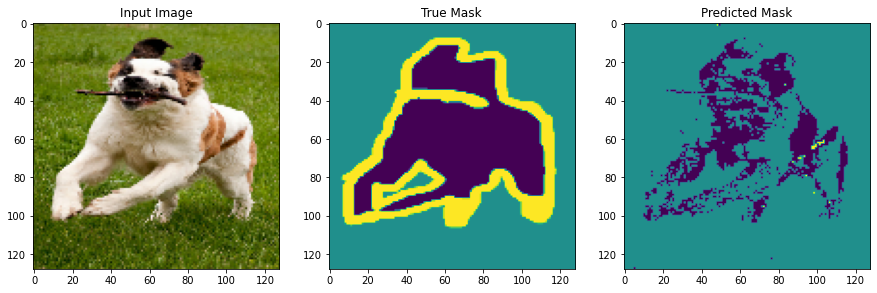

In [13]:
test_samp = tf.reshape(tf.constant(X_test[2,...]),(-1,c))
pred_im = prob_model_pixel(test_samp)
fig,axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(tf.keras.preprocessing.image.array_to_img(X_test[2,...]))
axs[0].set(title='Input Image')
axs[1].imshow(tf.keras.preprocessing.image.array_to_img(Y_test[2,...]))
axs[1].set(title='True Mask')
axs[2].imshow(tf.keras.preprocessing.image.array_to_img(pred_mask(pred_im)))
axs[2].set(title='Predicted Mask')
plt.show()

Now we will consider the whole image as a sample. First we'll use a convolutional neural network to encode the image by downsampling in the spatial dimensions and increasing the number of channels. Then the decoder upsamples the encoded image back into the original spatial dimensions and decreases the number of channels back to 3. Most deep-learning based image segmentation methods use convolutional neural networks with encoder/decoder architectures. 

In [14]:
model_ed = tf.keras.models.Sequential([
    tf.keras.Input(shape=(h,w,c)),
    # Encoder (Down Sampling in spatial dimension)
    tf.keras.layers.Conv2D(40,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(80,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(160,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(320,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # Decoder (Up-sampling in spatial dimension)
    tf.keras.layers.Conv2DTranspose(160,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(80,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(40,3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(3,3,strides=(2,2),padding='same',activation='relu'),
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_ed.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])
model_ed.summary()
BATCH_SIZE = 64
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
model_history = model_ed.fit(train_dataset,epochs=10,steps_per_epoch=STEPS_PER_EPOCH)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 40)        1120      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 40)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 80)        28880     
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 80)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 160)       115360    
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 160)       640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 320)        

In [15]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                 create_mask(model_ed.predict(sample_image[tf.newaxis, ...]))])

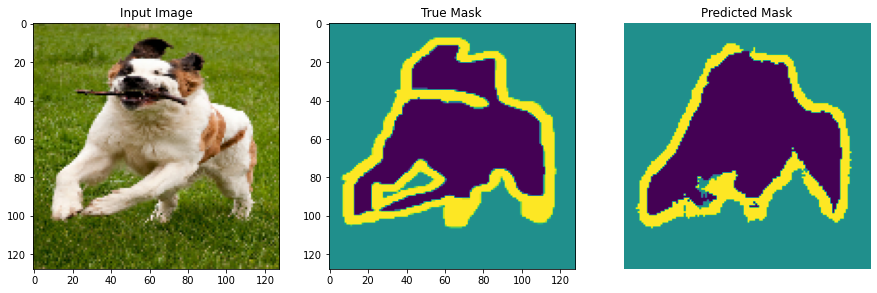

In [16]:
for image, mask in test.take(3):
    sample_image, sample_mask = image, mask
show_predictions()